# SHAP analysis for EDA part

SHAP (SHapley Additive exPlanations) is a method to explain individual predictions. The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction. The SHAP explanation method computes Shapley values from coalitional game theory. The feature values of a data instance act as players in a coalition. Shapley values tell us how to fairly distribute the "payout" (= the prediction) among the features. A player can be an individual feature value, e.g. for tabular data.

## Data Wrangling

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [53]:
train = pd.read_csv('train_Masha.csv')

In [54]:
train.head()

,Unnamed: 0,phone_id_x,order_completed_at,target,uid,is_for_test,mean_weight,retailer_churn_rate,phone_id_y,month_order_completed_tr,...,cancelled,shipped_item_count,promo_total,platform,os,dw_kind,ship_address_id,shipment_state,time_delivery_h,time_shipment_h
0,0,19843,2020-01,1.0,19843_01,0.0,NaN,NaN,19843.0,2020-01,...,0.0,5.0,-2000.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,1,19843,2020-02,0.0,19843_02,0.0,2580.0,0.644428,19843.0,2020-02,...,1.0,41.0,-2000.0,2.0,2.0,2.0,2.0,0.5,2.0,0.0
2,2,19843,2020-03,0.0,19843_03,0.0,9508.0,0.644428,19843.0,2020-03,...,0.0,6.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,4,19843,2020-04,0.0,19843_04,0.0,6150.0,0.630146,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,19843,2020-05,0.0,19843_05,0.0,NaN,NaN,19843.0,2020-05,...,0.0,6.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [55]:
new_features = pd.read_csv('features_cleaned.csv')

In [56]:
new_features.head()

,phone_id,month_order_completed_tr,shipment_number,total_receipt,total_cost,total_discount,total_replaced,total_cancelled,shipped_item_count,promo_total,...,used_unique_os,unique_dw_kind,unique_ship_address_id,unique_shipment_state,avg_time_spent_on_delivery,avg_time_spent_on_shipment,avg_hour_of_a_day_to_complete_order,unique_days_of_week_to_complete_order,unique_store_id,avg_rate
0,2.0,2020-01,1,4184.310007,98.0,1483.779999,0.0,1.0,29,0.0,...,1,1,1,1.0,2.0,0.0,10.0,1,1,4.76854
1,2.0,2020-02,2,7071.740047,366.0,1284.839994,2.0,1.0,64,0.0,...,2,2,2,1.0,4.5,0.0,10.5,2,2,4.76854
2,2.0,2020-03,1,5085.780035,233.0,1077.389990,2.0,0.0,45,0.0,...,1,1,1,1.0,18.0,0.0,12.0,1,1,4.76854
3,2.0,2020-05,1,6323.230021,248.0,825.089998,5.0,3.0,47,0.0,...,1,1,1,1.0,11.0,0.0,7.0,1,1,4.76854
4,3.0,2020-03,2,8038.860060,0.0,3736.220008,1.0,5.0,84,0.0,...,2,2,2,1.0,18.0,0.0,1.5,2,2,5.00000


In [57]:
train_clean = train[['phone_id_x','order_completed_at', 'target']]

In [58]:
train_clean.head()

,phone_id_x,order_completed_at,target
0,19843,2020-01,1.0
1,19843,2020-02,0.0
2,19843,2020-03,0.0
3,19843,2020-04,0.0
4,19843,2020-05,0.0


In [59]:
train_clean.rename(columns={'phone_id_x': 'phone_id'}, inplace=True)

/Users/aigerimshopenova/opt/anaconda3/envs/udacity_ds_nanodegree/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [60]:
train_clean.head()

,phone_id,order_completed_at,target
0,19843,2020-01,1.0
1,19843,2020-02,0.0
2,19843,2020-03,0.0
3,19843,2020-04,0.0
4,19843,2020-05,0.0


In [61]:
train_final = pd.merge(train_clean, new_features, left_on=['phone_id', 'order_completed_at'], right_on=['phone_id', 'month_order_completed_tr'], how='left')

In [62]:
train_final.head()

,phone_id,order_completed_at,target,month_order_completed_tr,shipment_number,total_receipt,total_cost,total_discount,total_replaced,total_cancelled,...,used_unique_os,unique_dw_kind,unique_ship_address_id,unique_shipment_state,avg_time_spent_on_delivery,avg_time_spent_on_shipment,avg_hour_of_a_day_to_complete_order,unique_days_of_week_to_complete_order,unique_store_id,avg_rate
0,19843,2020-01,1.0,2020-01,1.0,3473.900002,0.0,263.099998,0.0,0.0,...,1.0,1.0,1.0,0.0,2.5,0.0,19.0,1.0,1.0,5.0
1,19843,2020-02,0.0,2020-02,2.0,4569.800014,98.0,2242.660004,3.0,1.0,...,2.0,2.0,2.0,0.5,2.0,0.0,11.0,2.0,2.0,5.0
2,19843,2020-03,0.0,2020-03,1.0,1536.930031,98.0,93.199997,0.0,0.0,...,1.0,1.0,1.0,0.0,2.5,0.0,15.0,1.0,1.0,5.0
3,19843,2020-04,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19843,2020-05,0.0,2020-05,1.0,2129.949951,98.0,20.990000,0.0,0.0,...,1.0,1.0,1.0,0.0,2.5,0.0,13.0,1.0,1.0,5.0


In [63]:
train_final.isnull().sum().sum()

9336120

In [64]:
train_fin = train_final[train_final['order_completed_at'] == '2020-07']

In [65]:
train_fin.isnull().sum().sum()

2543360

In [66]:
train_fin.fillna(0, inplace=True)

/Users/aigerimshopenova/opt/anaconda3/envs/udacity_ds_nanodegree/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [67]:
train_fin.head()

,phone_id,order_completed_at,target,month_order_completed_tr,shipment_number,total_receipt,total_cost,total_discount,total_replaced,total_cancelled,...,used_unique_os,unique_dw_kind,unique_ship_address_id,unique_shipment_state,avg_time_spent_on_delivery,avg_time_spent_on_shipment,avg_hour_of_a_day_to_complete_order,unique_days_of_week_to_complete_order,unique_store_id,avg_rate
6,19843,2020-07,1.0,0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.00000
9,173074,2020-07,0.0,0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.00000
16,101944,2020-07,0.0,2020-07,7.0,18457.510216,1147.0,400.000000,0.0,0.0,...,7.0,7.0,7.0,0.0,6.625,0.0,16.428571,7.0,7.0,5.00000
20,615032,2020-07,0.0,0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.00000
27,342522,2020-07,0.0,2020-07,1.0,3734.270044,199.0,1082.819989,0.0,0.0,...,1.0,1.0,1.0,1.0,3.000,0.0,12.000000,1.0,1.0,4.76854


In [68]:
train_fin.shape

(284449, 23)

In [69]:
train_fin.drop(columns=['order_completed_at', 'month_order_completed_tr'], inplace=True)

/Users/aigerimshopenova/opt/anaconda3/envs/udacity_ds_nanodegree/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [70]:
train_fin['target'].value_counts()

0.0    151807
1.0    132642
Name: target, dtype: int64

In [71]:
train_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284449 entries, 6 to 1159575
Data columns (total 21 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   phone_id                               284449 non-null  int64  
 1   target                                 284449 non-null  float64
 2   shipment_number                        284449 non-null  float64
 3   total_receipt                          284449 non-null  float64
 4   total_cost                             284449 non-null  float64
 5   total_discount                         284449 non-null  float64
 6   total_replaced                         284449 non-null  float64
 7   total_cancelled                        284449 non-null  float64
 8   shipped_item_count                     284449 non-null  float64
 9   promo_total                            284449 non-null  float64
 10  used_unique_platforms                  284449 non-null 

In [72]:
df = train_fin.copy()

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284449 entries, 6 to 1159575
Data columns (total 21 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   phone_id                               284449 non-null  int64  
 1   target                                 284449 non-null  float64
 2   shipment_number                        284449 non-null  float64
 3   total_receipt                          284449 non-null  float64
 4   total_cost                             284449 non-null  float64
 5   total_discount                         284449 non-null  float64
 6   total_replaced                         284449 non-null  float64
 7   total_cancelled                        284449 non-null  float64
 8   shipped_item_count                     284449 non-null  float64
 9   promo_total                            284449 non-null  float64
 10  used_unique_platforms                  284449 non-null 

## Random Forest Classifier

In [74]:
df.drop(columns=['phone_id'], inplace=True)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'target'],\
                                                    df['target'], stratify=df['target'],\
                                                    test_size = 0.1, random_state=66)

In [76]:
X_train.shape

(256004, 19)

In [77]:
X_test.shape

(28445, 19)

In [78]:
y_train.shape

(256004,)

In [79]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_depth=20, random_state=0, max_features='sqrt',\
                            class_weight='balanced')
rf.fit(X_train, y_train)

# Make predictions for the test set
y_pred_test = rf.predict(X_test)

# Print accuracy for the training and test sets
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.803
Accuracy on test set: 0.706


In [80]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.70      0.78      0.74     15181
         1.0       0.71      0.62      0.66     13264

    accuracy                           0.71     28445
   macro avg       0.71      0.70      0.70     28445
weighted avg       0.71      0.71      0.70     28445



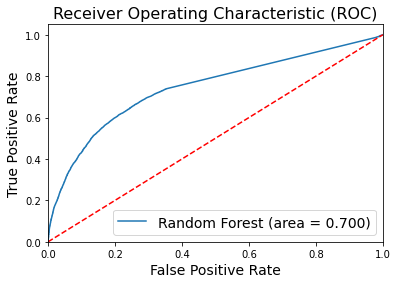

In [81]:
# Building ROC curve
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.3f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.savefig('RF_ROC', fontsize=14)
plt.show();

## SHAP analysis

In [82]:
# Import the package
import shap
shap.initjs()

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 20.3 µs


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


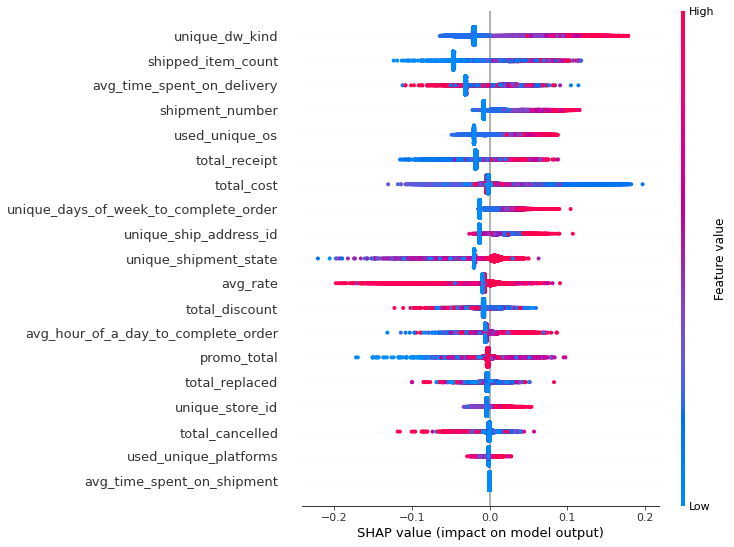

In [83]:
%time
samples = X_test

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(samples, approximate=False, check_additivity=False)

shap.summary_plot(shap_values[1], samples)

In [84]:
def make_shap_waterfall_plot(shap_values, features, num_display=20):
    
    '''
    A function for building a SHAP waterfall plot.
    
    SHAP waterfall plot is used to visualize the most important features in a descending order.
    
    Parameters:
    shap_values (list): SHAP values obtained from a model
    features (pandas DataFrame): a list of features used in a model
    num_display(int): number of features to display
    
    Returns:
    matplotlib.pyplot plot: SHAP waterfall plot
    
    '''
    
    column_list = features.columns
    feature_ratio = (np.abs(shap_values).sum(0) / np.abs(shap_values).sum()) * 100
    column_list = column_list[np.argsort(feature_ratio)[::-1]]
    feature_ratio_order = np.sort(feature_ratio)[::-1]
    cum_sum = np.cumsum(feature_ratio_order)
    column_list = column_list[:num_display]
    feature_ratio_order = feature_ratio_order[:num_display]
    cum_sum = cum_sum[:num_display]
    
    num_height = 0
    if (num_display >= 20) & (len(column_list) >= 20):
        num_height = (len(column_list) - 20) * 0.4
        
    fig, ax1 = plt.subplots(figsize=(8, 8 + num_height))
    ax1.plot(cum_sum[::-1], column_list[::-1], c='blue', marker='o')
    ax2 = ax1.twiny()
    ax2.barh(column_list[::-1], feature_ratio_order[::-1], alpha=0.6)
    
    ax1.grid(True)
    ax2.grid(False)
    ax1.set_xticks(np.arange(0, round(cum_sum.max(), -1)+1, 10))
    ax2.set_xticks(np.arange(0, round(feature_ratio_order.max(), -1)+1, 10))
    ax1.set_xlabel('Cumulative Ratio')
    ax2.set_xlabel('Composition Ratio')
    ax1.tick_params(axis="y", labelsize=13)
    plt.ylim(-1, len(column_list))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


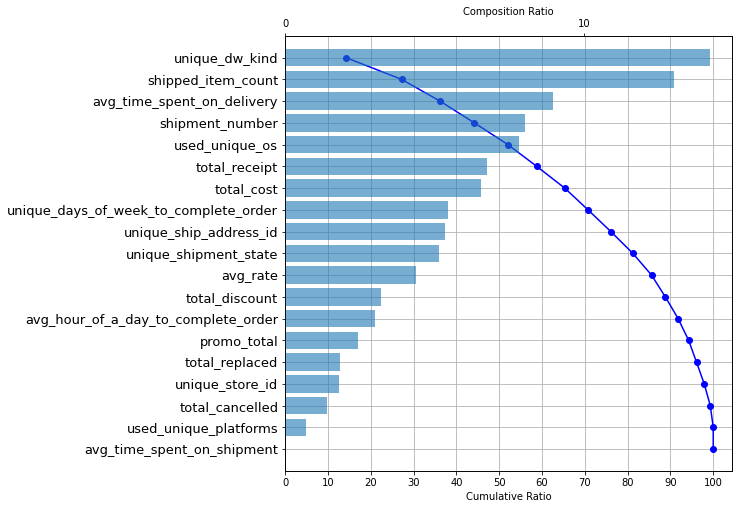

In [85]:
%time
# Shapp waterfall plot
make_shap_waterfall_plot(shap_values[1], samples)

In [ ]:
# Let's have a look on the top features and their dependence plots
top_features = ['', '', '', '', '']

In [ ]:
for feature in top_features:
    shap.dependence_plot(feature, shap_values[1], samples, interaction_index=None)